#### Modelo SIR de propagação infecciosa em redes de Barabàsi-Albert e Erdös-Renyi

Neste modelo utilizamos que cada indivíduo possui 3 estados: **(I)** Infectado, **(S)** Susceptível e **(R)** Removido.
Faremos uma modelagem de como uma doença infecciosa se propaga em uma rede cujos vértices podem assumir esses 3 estados e transmitir a doença com uma probabilidade **$B$** e letalidade com probabilidade **$L$**.

Denotamos como $s(t)$ o número de susceptíveis no intante $t$, $i(t)$ o número de infectados e $r(t)$ removidos. Normalizado pelo tamanho da população temos que a soma: $s(t) + i(t) + r(t) = 1$ com $i(0) = 1$, $r(t) = \dfrac{1}{n}$ e $s(0) = 1 - \dfrac{1}{n}$.


O parâmetro $T$ é dado pelo inverso do tempo de recuperação, assim para uma doença com 15 dias para o fim dos sintomas obtemos 
$T = \dfrac{1}{t_r} = \dfrac{1}{15}$.

Já o tempo de contato é o denominador do nosso parâmetro $B$, que define o tempo que uma pessoa pode transmitir. No caso de uma doença com $t_c = 15$ é dado
$B = \dfrac{1}{t_c} = \dfrac{1}{5}$.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
N = 1000
KMED = 10
g = nx.barabasi_albert_graph(N, KMED//2)

In [17]:
def modelo_sir_propagacao(g, B, T):
    '''
    Argumentos:
    g -> grafo
    B -> Taxa de remoção
    T -> Taxa de transmissão
    
    Estados possíveis dos indivíduos:
    0 - Susceptível
    1 - Infectado
    2 - Removido (Recuperado ou óbito)
    
    Retorno:
    Np.array -> Número de infectados em cada t normalizado pelo tamanho da rede (n).
    Np.array -> Número de removidos em cada t normalizado (n).
    '''
    
    n = g.number_of_nodes()
    estados = np.zeros(n)

    paciente0 = np.random.randint(n)
    estados[paciente0] = 1
    infectados = {paciente0}
    it = [1]
    rt = [0]

    t = 0

    while(len(infectados) > 0):
        new_it = it[t]
        new_rt = rt[t]

        for ind_infectado in infectados.copy():
            ## Probabilidade de passar para estado R
            if np.random.random() < B: 
                estados[ind_infectado] = 2
                infectados.remove(ind_infectado)
                new_it = new_it - 1
                new_rt = new_rt + 1
            for vizinho in g.neighbors(ind_infectado):
            ## Probabilidade de transmitir para os vizinhos
                if estados[vizinho] == 0 and np.random.random() < T:
                    estados[vizinho] = 1
                    infectados.add(vizinho)
                    new_it += 1
        ## Atualiza a lista no intante t
        it.append(new_it)
        rt.append(new_rt)
        t+=1
    return np.array(it)/n, np.array(rt)/n

In [34]:
def SIR_evolucao(gerador_grafo, B, T, nrep):
    
    '''
    Entrada:
    gerador_grafo -> gerador de grafos, com número de vértices e grau média da rede
    B -> Probabilidade de passar para estado 2
    T -> Probabilidade de transmissão para vizinhos
    nrep -> número de simulações
    
    Saída:
    Média e desvio padrão dos infectados e removidos pra cada instante de t.
    '''
    its = []
    rts = []
    tmax = 0
    
    #Efetua a simulação nrep vezes e armazena os vetores de infectados e removidos
    for rep in range(nrep):
        g = gerador_grafo()
        itr, rtr = modelo_sir_propagacao(g, B, T)
        its.append(itr)
        rts.append(rtr)
        if itr.size > tmax: 
            tmax = len(itr)
    its_arr = np.zeros((nrep, tmax))
    rts_arr = np.zeros((nrep, tmax))
    
    #armazena na matriz os vetores de infectados e removidos em cada instante de tempo
    for rep in range(nrep):
        its_arr[rep, :its[rep].size] = its[rep]
        rts_arr[rep, :rts[rep].size] = rts[rep]
        rts_arr[rep, rts[rep].size:] = rts[rep][-1]
        
    #retorna a média em cada período de tempo com todas simulações
    return (np.mean(its_arr, axis=0), np.std(its_arr, axis=0, ddof=1),
            np.mean(rts_arr, axis=0), np.std(rts_arr, axis=0, ddof=1))

In [161]:
def plot_evolucao(avit, avrt, titulo):
    plt.style.use("dark_background")
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)
    ax.plot(np.arange(len(avit)),avit, linewidth = 1.5, color = 'white', label='Infectados')
    ax.plot(np.arange(len(avrt)),avrt, linewidth = 1.5, color = 'red', label='Removidos')
    ax.plot(1-avit-avrt,linewidth = 1.5, color = 'blue', label='Susceptíveis')
    ax.set_xlabel("Unidade de tempo")
    ax.set_ylabel("Porção da população")
    ax.set_title(titulo)
    ax.grid()

    #ax.axvline(x = np.where(avit == max(avit)),color = 'orange', linewidth = 1.5,linestyle = '--', label = 'Pico de infectados')
    ax.legend()

#### Evolução em uma rede Barabási-Albert

In [162]:
N = 1000
KMED =10
REP = 20
B = 1/15
T = 1/15

avit_ba, sdit_ba, avrt_ba,sdit_ba = SIR_evolucao(lambda : nx.barabasi_albert_graph(N, KMED//2), B, T, REP)

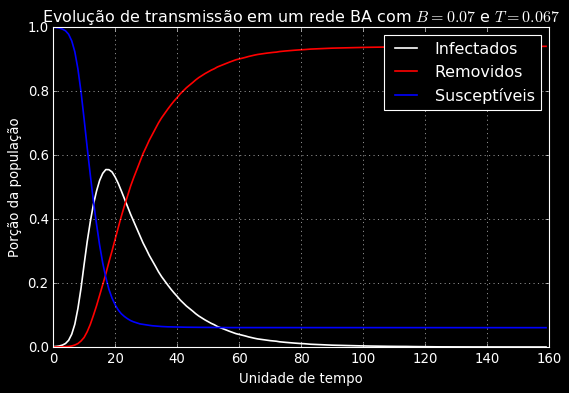

In [163]:
plot_evolucao(avit_ba,avrt_ba,"Evolução de transmissão em um rede BA com $B = %.2f$ e $T = %.3f$"%(B,T))

In [164]:
N = 1000
KMED =10
REP = 20
B = 1/10
T = 1/20

avit_ba, sdit_ba, avrt_ba, sdit_ba = SIR_evolucao(lambda : nx.barabasi_albert_graph(N, KMED//2), B, T, REP)

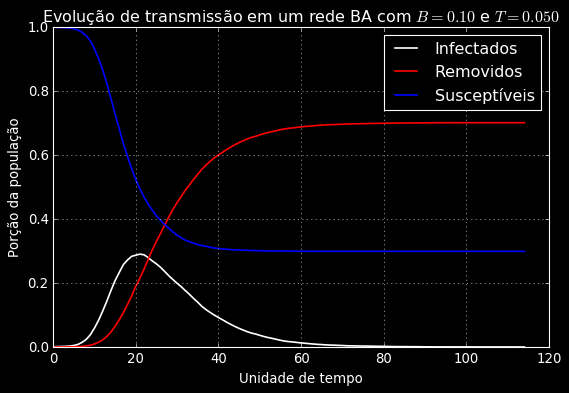

In [165]:
plot_evolucao(avit_ba,avrt_ba,"Evolução de transmissão em um rede BA com $B = %.2f$ e $T = %.3f$"%(B,T))

#### Evolução em uma rede Erdos-Renyi

In [166]:
N = 1000
KMED =10
REP = 20
B = 1/15
T = 1/15

avit_er, sdit_er, avrt_er, sdit_er = SIR_evolucao(lambda: nx.erdos_renyi_graph(N, KMED/N), B, T, REP)

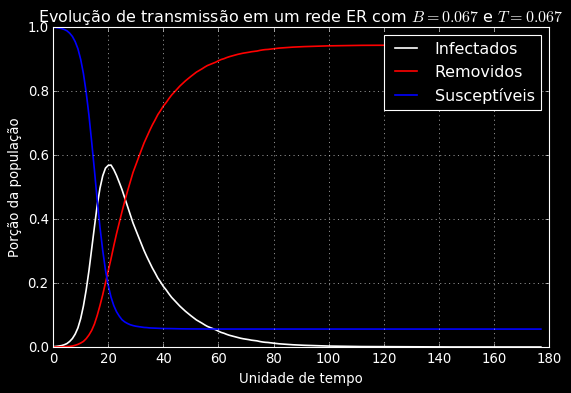

In [167]:
plot_evolucao(avit_er,avrt_er,"Evolução de transmissão em um rede ER com $B = %.3f$ e $T = %.3f$"%(B,T))

In [168]:
N = 1000
KMED =10
REP = 20
B = 1/10
T = 1/20

avit_er, sdit_er, avrt_er, sdit_er = SIR_evolucao(lambda: nx.erdos_renyi_graph(N, KMED/N), B, T, REP)

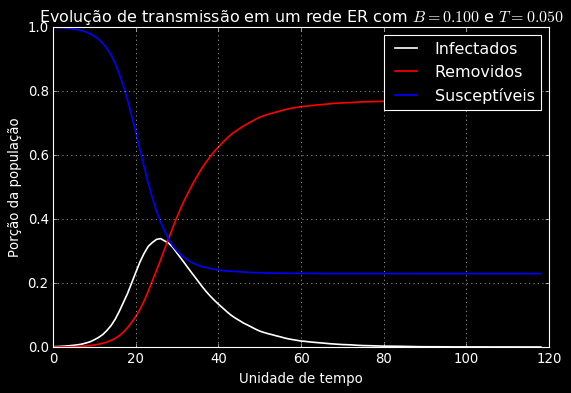

In [169]:
plot_evolucao(avit_er,avrt_er,"Evolução de transmissão em um rede ER com $B = %.3f$ e $T = %.3f$"%(B,T))

### Comparativo de propagação entre redes BA-ER

In [170]:
N = 1000
KMED =10
REP = 20
B = 1/10
T = 1/20

avit_er, sdit_er, avrt_er, sdit_er = SIR_evolucao(lambda: nx.erdos_renyi_graph(N, KMED/N), B, T, REP)
avit_ba, sdit_ba, avrt_ba, sdit_ba = SIR_evolucao(lambda : nx.barabasi_albert_graph(N, KMED//2), B, T, REP)

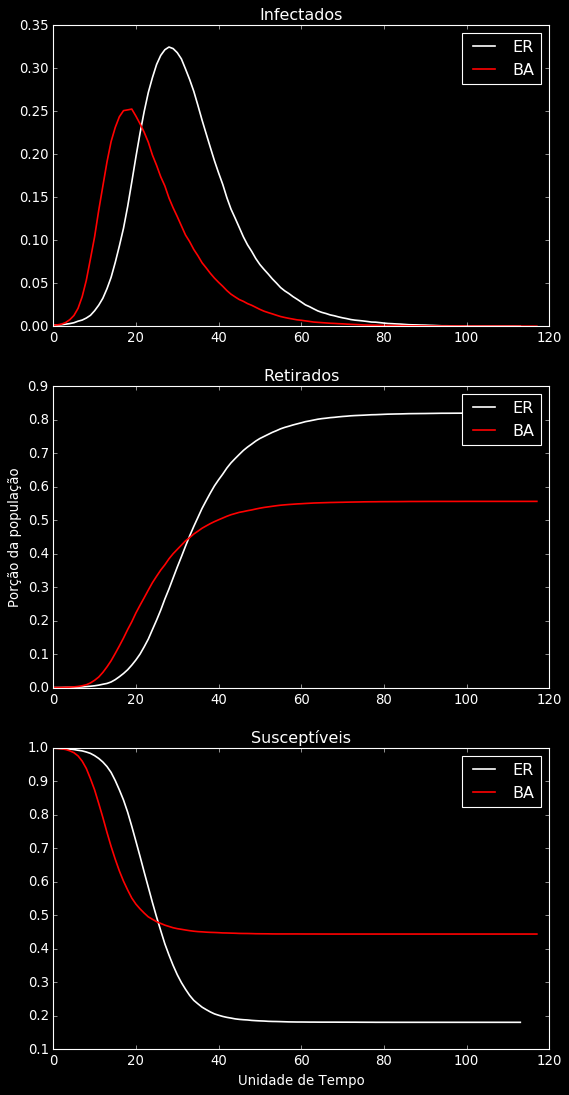

In [179]:
plt.rcParams['figure.figsize']=(8,16)

fig,axs = plt.subplots(3)
axs[0].set_title("Comparativo $R_0 = %.3f$"%(B/T))
axs[2].set_xlabel("Unidade de Tempo")
axs[1].set_ylabel("Porção da população")

axs[0].set_title("Infectados")
axs[0].plot(avit_er, color = 'white', linewidth = 1.5, label = "ER")
axs[0].plot(avit_ba, color = 'red', linewidth = 1.5, label ="BA")

axs[1].set_title("Retirados")
axs[1].plot(avrt_er, color = 'white', linewidth = 1.5, label = "ER")
axs[1].plot(avrt_ba, color = 'red', linewidth = 1.5, label ="BA")

axs[2].set_title("Susceptíveis")
axs[2].plot(1-avrt_er-avit_er, color = 'white', linewidth = 1.5, label = "ER")
axs[2].plot(1-avrt_ba-avit_ba, color = 'red', linewidth = 1.5, label ="BA")

for i in axs.flat:
    i.legend()

In [180]:
N = 1000
KMED =10
REP = 20
B = 1/15
T = 1/15

avit_er, sdit_er, avrt_er, sdit_er = SIR_evolucao(lambda: nx.erdos_renyi_graph(N, KMED/N), B, T, REP)
avit_ba, sdit_ba, avrt_ba, sdit_ba = SIR_evolucao(lambda : nx.barabasi_albert_graph(N, KMED//2), B, T, REP)

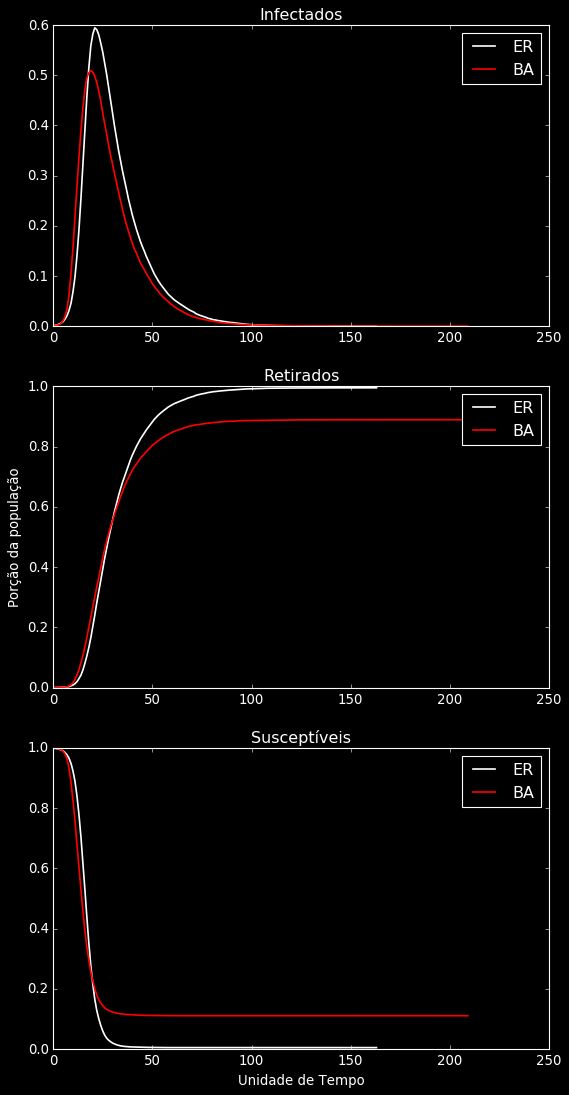

In [181]:
plt.rcParams['figure.figsize']=(8,16)

fig,axs = plt.subplots(3)
axs[0].set_title("Comparativo $R_0 = %.3f$"%(B/T))
axs[2].set_xlabel("Unidade de Tempo")
axs[1].set_ylabel("Porção da população")

axs[0].set_title("Infectados")
axs[0].plot(avit_er, color = 'white', linewidth = 1.5, label = "ER")
axs[0].plot(avit_ba, color = 'red', linewidth = 1.5, label ="BA")

axs[1].set_title("Retirados")
axs[1].plot(avrt_er, color = 'white', linewidth = 1.5, label = "ER")
axs[1].plot(avrt_ba, color = 'red', linewidth = 1.5, label ="BA")

axs[2].set_title("Susceptíveis")
axs[2].plot(1-avrt_er-avit_er, color = 'white', linewidth = 1.5, label = "ER")
axs[2].plot(1-avrt_ba-avit_ba, color = 'red', linewidth = 1.5, label ="BA")

for i in axs.flat:
    i.legend()

As redes de Barabasi-Albert obteve um número menor de infectados que a Erdos-Renyi, vamos tentar observar a velocidade de propagação por meio dos gráficos na escala logaritmica para o eixo 'y'.

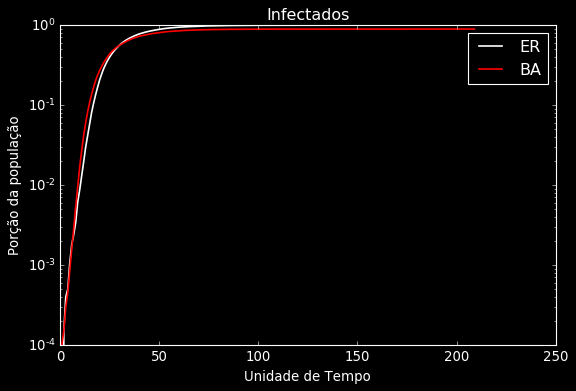

In [185]:
plt.rcParams['figure.figsize']=(8,5)

fig,axs = plt.subplots()
axs.set_title("Comparativo $R_0 = %.3f$"%(B/T))
axs.set_xlabel("Unidade de Tempo")
axs.set_ylabel("Porção da população")

axs.set_title("Infectados")
axs.semilogy(avrt_er, color = 'white', linewidth = 1.5, label = "ER")
axs.semilogy(avrt_ba, color = 'red', linewidth = 1.5, label ="BA")
axs.legend()